<a href="https://colab.research.google.com/github/daisyKim12/Tensorflow_Study/blob/main/Lecture_C2_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Category 2
Use fully connected layer to make a image classification model

#Problem

Fashion MNIST 데이터 셋에 대한 분류기 테스트는 10개의 클래스를 분류할 것으로 예상하고 입력 모양은 Fashion MNIST 데이터 셋의 기본 크기이어야 합니다. 28x28 단색. 데이터 크기를 조정하지 말고 input_space는 반드시 (28x28)의 크기를 사용합니다.

#Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

# Load Data

tf.keras.datasets provides various datas

* boston_housing
* cifar10
* cifar100
* fashion_mnist
* imdb
* mnist
* reuters

In [2]:
fashion_mnist_dataset = tf.keras.datasets.fashion_mnist

In [3]:
fashion_mnist_dataset

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

when using `tf.keras.datasets` must use `load_data()` to extract data

In [4]:
(x_train, y_train), (x_valid, y_valid) = fashion_mnist_dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


using `.shape()` to check size and dimension

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_valid.shape, y_valid.shape

((10000, 28, 28), (10000,))

# Normalization
* Change pixel value into 0~1 value by dividing by 255
* __Caution__ Normalization is only for __Feature(x)__ data not for __Label(Y)__
* By normalizing 2~3% of performance improvment is expected

before normalization check max, min value

In [7]:
x_train.min(), x_train.max()

(0, 255)

In [8]:
x_train = x_train / 255.0
x_valid = x_valid / 255.0

In [9]:
x_train.min(), x_train.max()

(0.0, 1.0)

# Data Visualization

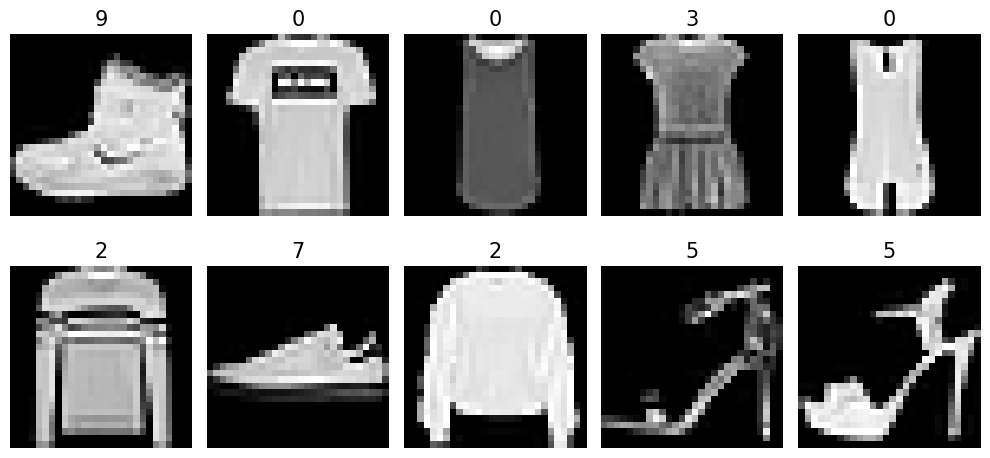

In [10]:
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)

for i in range(10):
    axes[i//5, i%5].imshow(x_train[i], cmap='gray')
    axes[i//5, i%5].set_title(str(y_train[i]), fontsize=15)
    plt.setp( axes[i//5, i%5].get_xticklabels(), visible=False)
    plt.setp( axes[i//5, i%5].get_yticklabels(), visible=False)
    axes[i//5, i%5].axis('off')

plt.tight_layout()
plt.show()

#Flatten Layer
Flatten layer change high dimension data into 1D data in order to pass it to Dense Layer. Often used in Image Classification.

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x = Flatten(input_shape=(28,28))
print(x(x_train).shape)

(60000, 784)


#Modeling

* When classifying image one must use __Flatten Layer__ to change 2D into 1D
* With more complicated problems enlarging the number of node and layer will help
* __Caution__: Number of node in the output layout must match the number of classification

In [13]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                6

#Compile

1. optimizer: adam
2. loss function:   
  * For output layer with activation function sigmoid: binary_crossentropy
  * For output layer with activation function softmax:
    * One-hot-encoded(o): categorical_crossentropy
    * One-hot-encoded(x): sparse_categorical_crossentropy
3. Setting metrics to 'acc', we can monitor model accuracy while learnin.

**How to check if Label data is One-hot-encoded or not**

case 1: not encoded

In [15]:
y_train[0]

9

case 2: encoded

In [16]:
print(tf.one_hot(y_train[0],10))

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)


**model.compile()**

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# ModelCheckpoint

Using `val_loss` to monitor the performance of the model, in every epoch save the model weight with lowest `val_loss`

In [18]:
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only = True,
                             save_best_only = True,
                             monitor = 'val_loss',
                             verbose=1)

#Fit

In [19]:
history = model.fit(x_train, y_train,
                    validation_data = (x_valid, y_valid),
                    epochs = 20,
                    callbacks=[checkpoint],
                    )

Epoch 1/20
1866/1875 [============================>.] - ETA: 0s - loss: 0.4980 - acc: 0.8204
Epoch 1: val_loss improved from inf to 0.50878, saving model to my_checkpoint.ckpt
1875/1875 [==============================] - 15s 5ms/step - loss: 0.4971 - acc: 0.8207 - val_loss: 0.5088 - val_acc: 0.8265
Epoch 2/20
1873/1875 [============================>.] - ETA: 0s - loss: 0.3767 - acc: 0.8631
Epoch 2: val_loss improved from 0.50878 to 0.41259, saving model to my_checkpoint.ckpt
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3767 - acc: 0.8631 - val_loss: 0.4126 - val_acc: 0.8572
Epoch 3/20
1869/1875 [============================>.] - ETA: 0s - loss: 0.3380 - acc: 0.8770
Epoch 3: val_loss improved from 0.41259 to 0.37921, saving model to my_checkpoint.ckpt
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3378 - acc: 0.8770 - val_loss: 0.3792 - val_acc: 0.8621
Epoch 4/20
1875/1875 [==============================] - ETA: 0s - loss: 0.3166 - acc: 0.8830
E

__Caution__ Make sure after learning process is finished load_weight from checkpoint to load the weight checkpoint is saving, which is the weight of the lowest val_loss

In [20]:
model.load_weights(checkpoint_path)

#Predict


In [21]:
model.evaluate(x_valid, y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 0.3266 - acc: 0.8885


[0.3266199827194214, 0.8884999752044678]

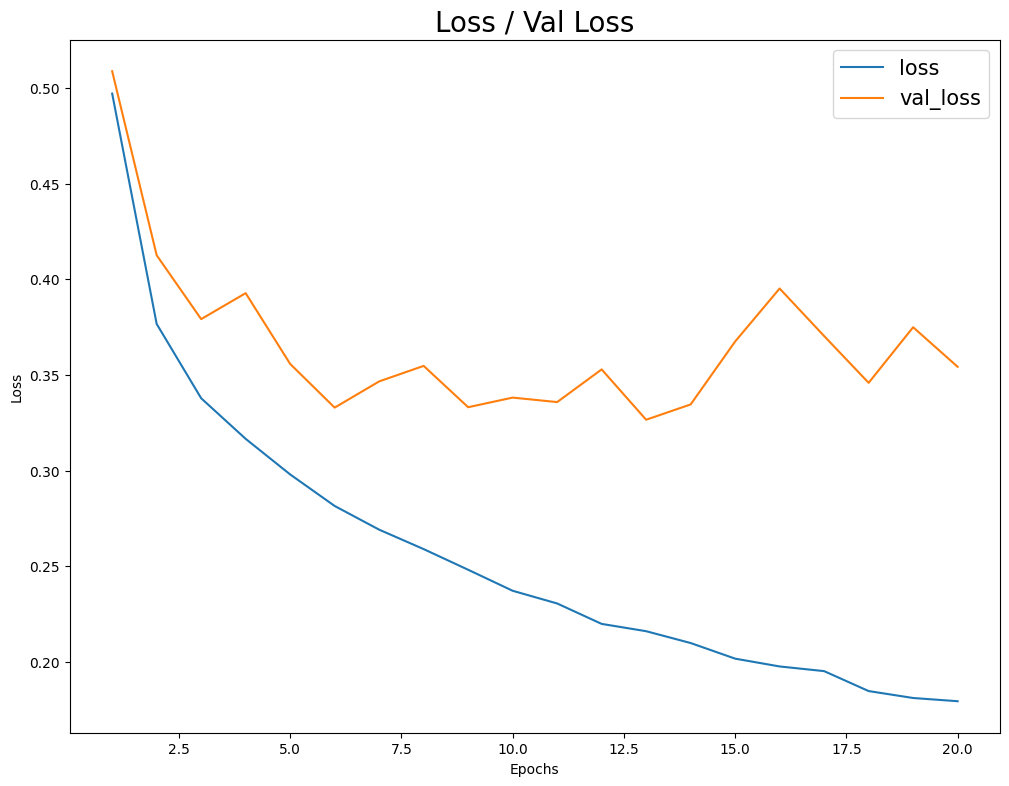

In [22]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['loss'])
plt.plot(np.arange(1, 21), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

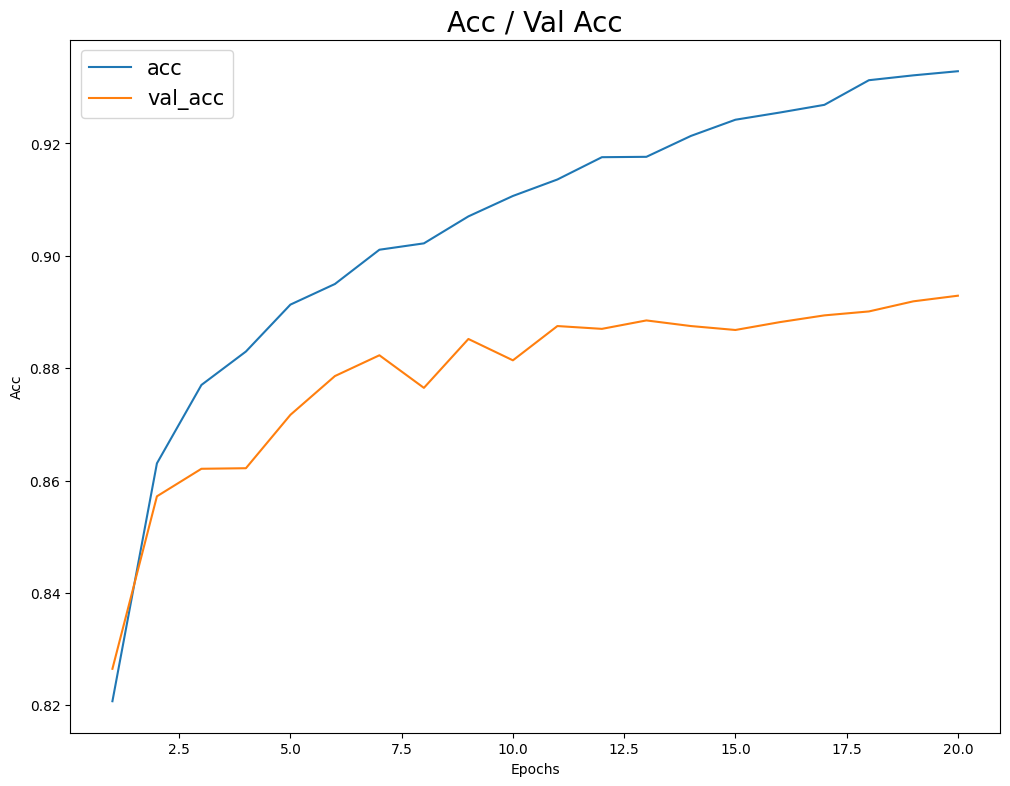

In [23]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['acc'])
plt.plot(np.arange(1, 21), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()